# seaborn (lmplot -> regplot + FacetGrid) 

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

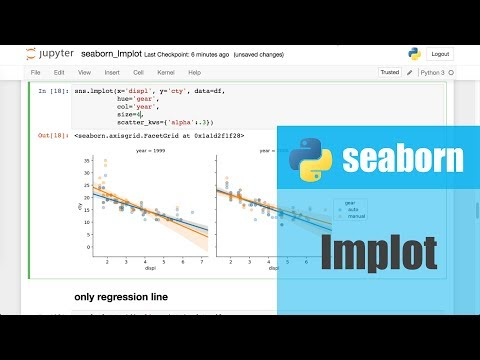

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ciqbpV5f9Rc', width=720, height=405)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f"pandas  version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 0.25.3
seaborn version = 0.9.0


## read miles per gallon dataset (mpg.csv)

In [4]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
0,audi,a4,1.8,1999,4,auto(l5),front,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),front,21,29,p,compact,manual
2,audi,a4,2.0,2008,4,manual(m6),front,20,31,p,compact,manual
3,audi,a4,2.0,2008,4,auto(av),front,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact,auto


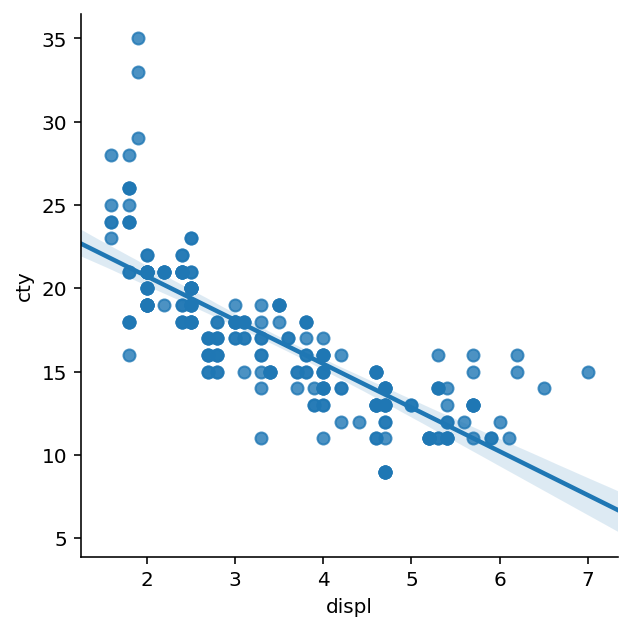

In [6]:
sns.lmplot(x='displ', y='cty', data=df, height=4.5)

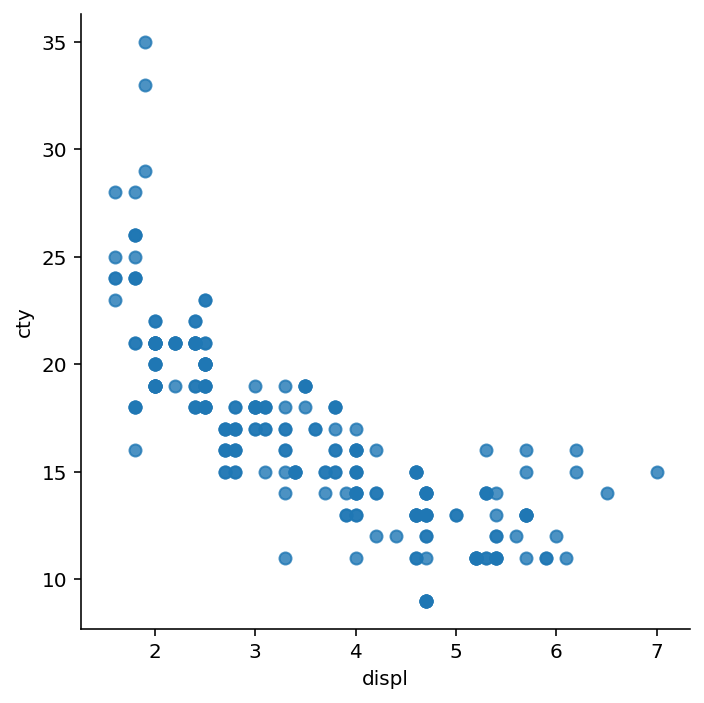

In [7]:
sns.lmplot(x='displ', y='cty', data=df,
           fit_reg=False)

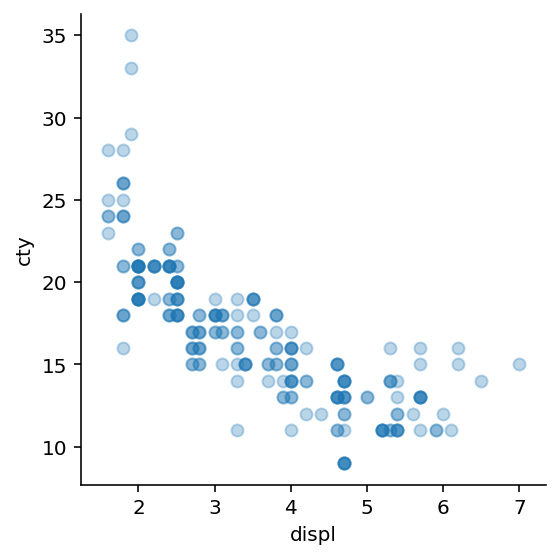

In [8]:
sns.lmplot(x='displ', y='cty', data=df,
           height=4,
           fit_reg=False,
           scatter_kws={'alpha':.3})

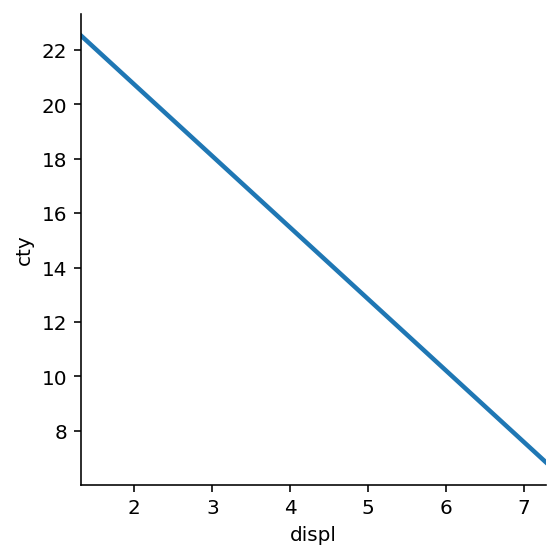

In [9]:
sns.lmplot(x='displ', y='cty', data=df,
           height=4,
           fit_reg=True,
           ci=False,
           scatter=False)

### add hue

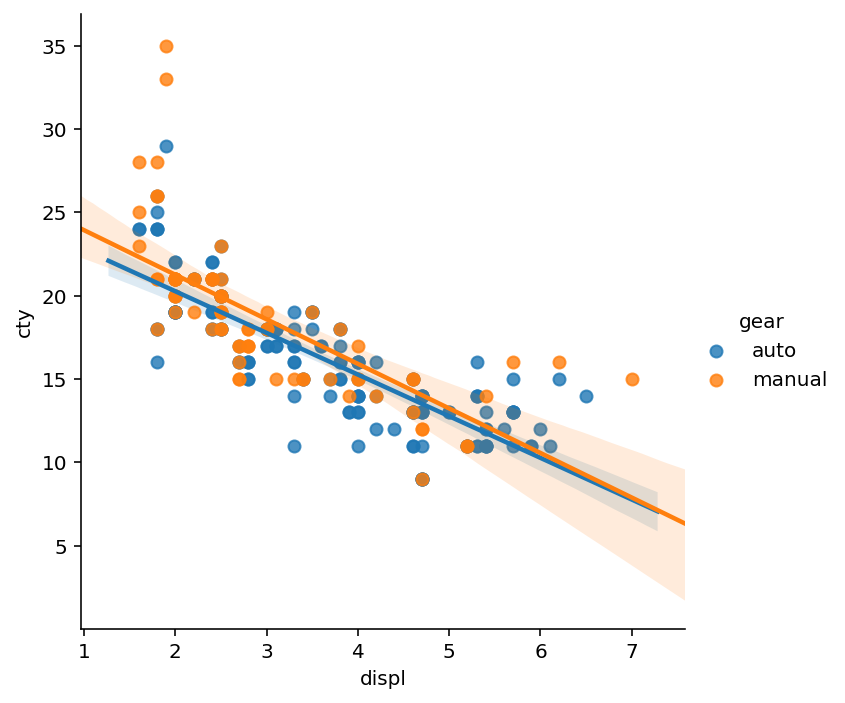

In [10]:
sns.lmplot(x='displ', y='cty', data=df, 
           hue='gear')

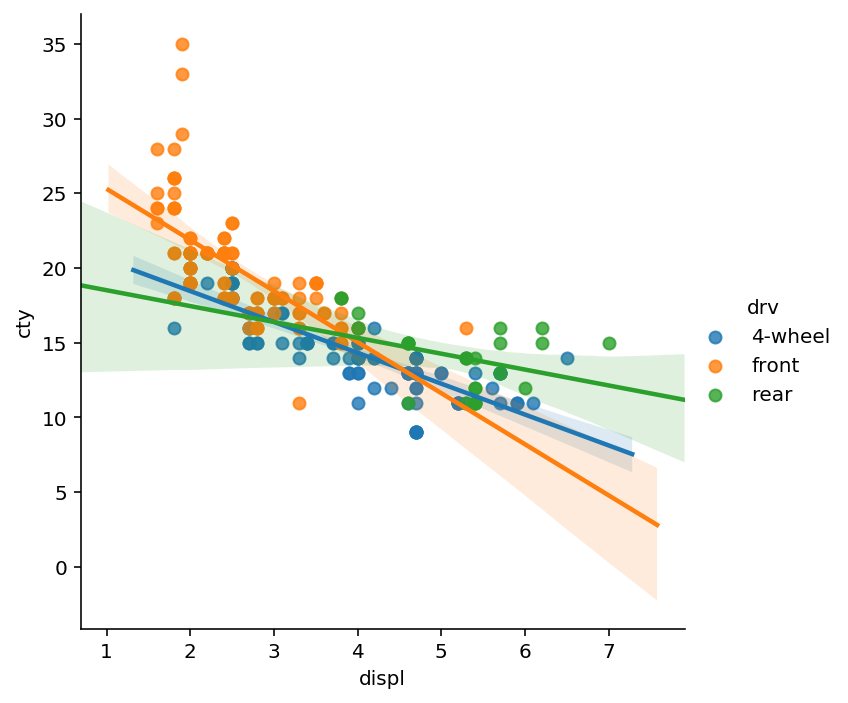

In [11]:
sns.lmplot(x='displ', y='cty', data=df, 
           hue='drv')

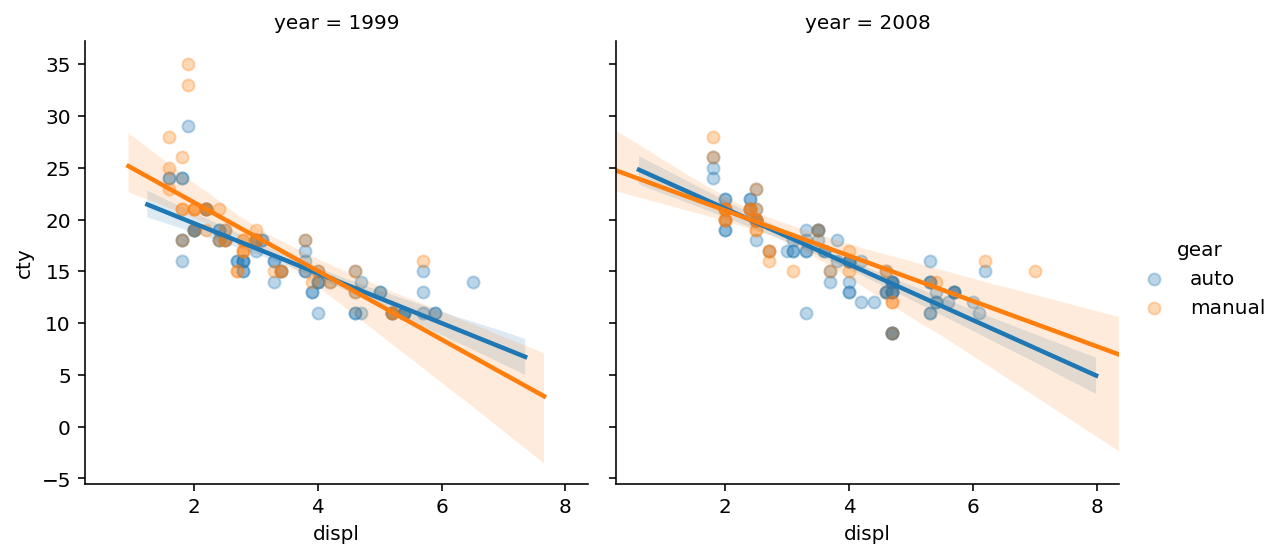

In [12]:
sns.lmplot(x='displ', y='cty', data=df, 
           hue='gear',
           col='year',
           height=4,
           scatter_kws={'alpha':.3})

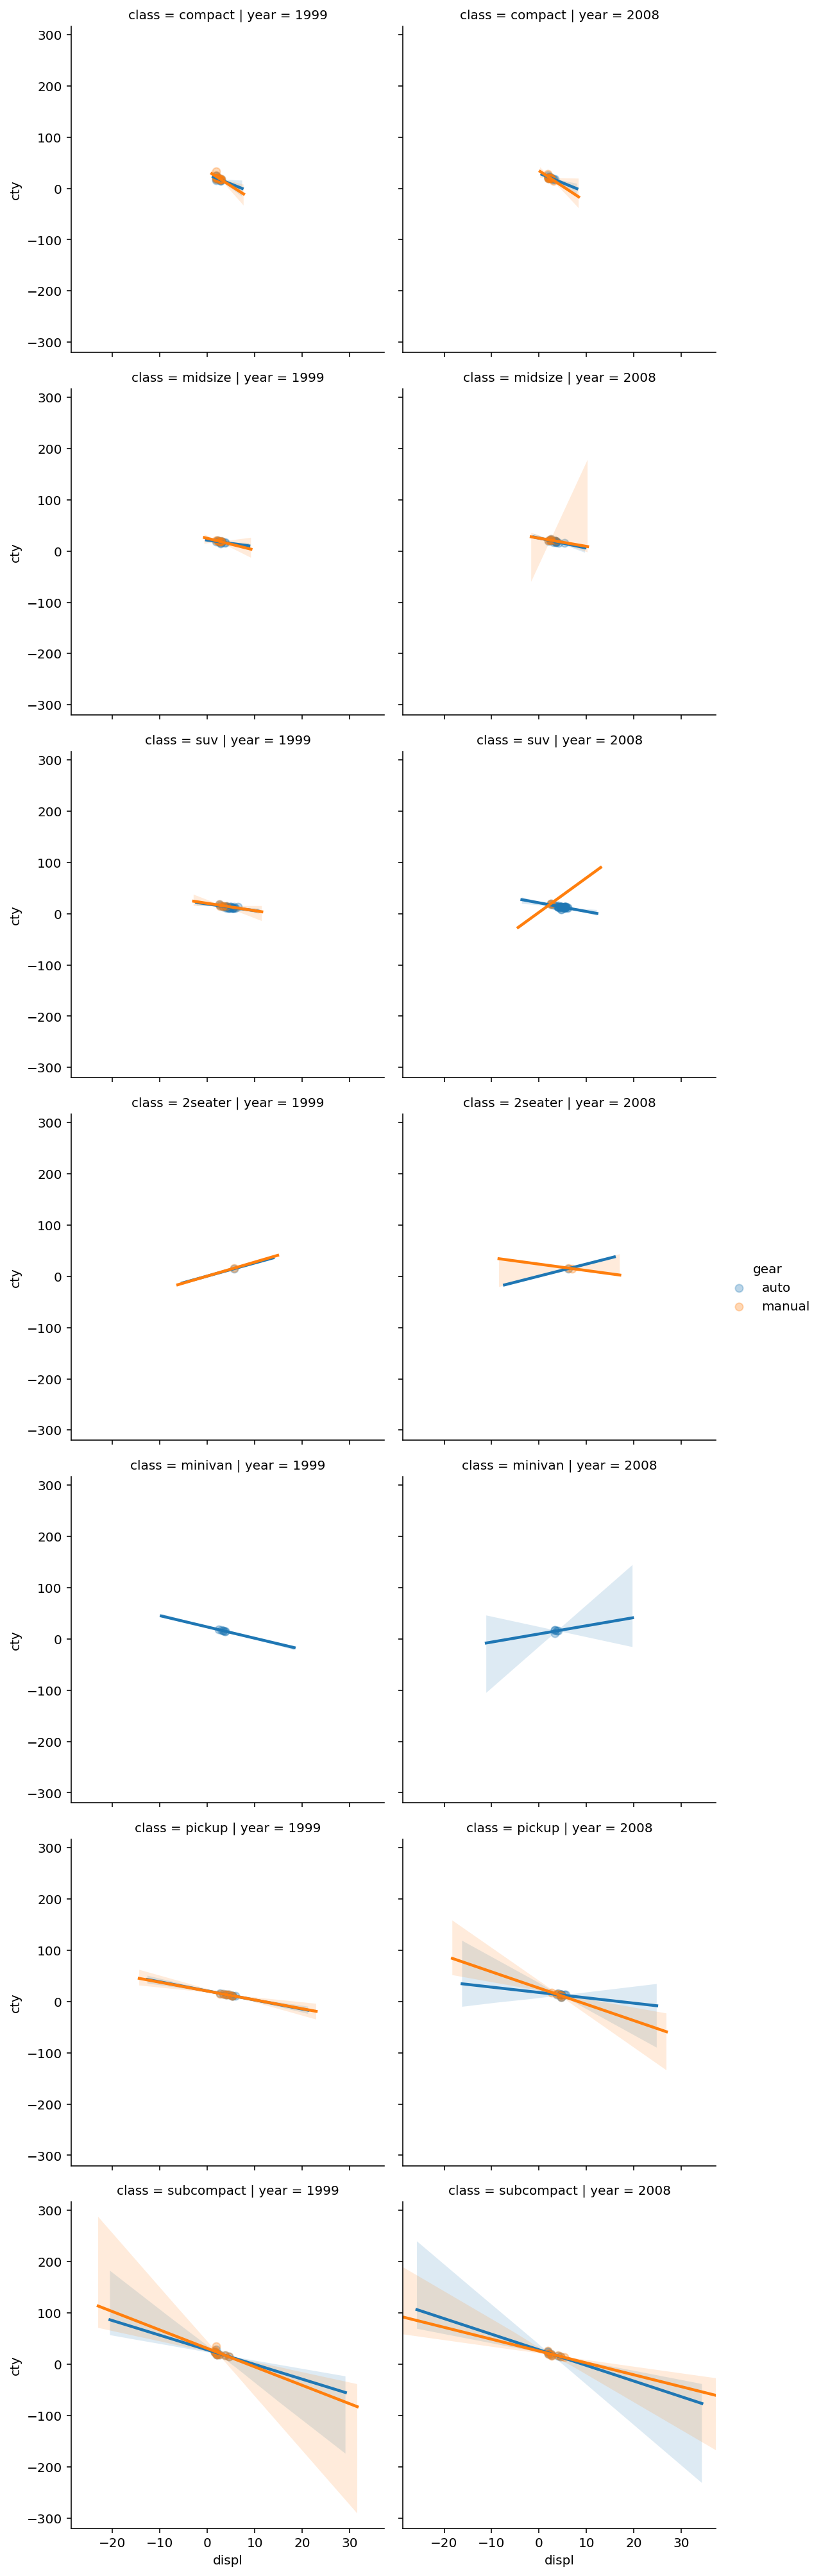

In [13]:
sns.lmplot(x='displ', y='cty', data=df, 
           hue='gear',
           col='year',
           row='class',
           height=4,
           scatter_kws={'alpha':.3})

## only regression line

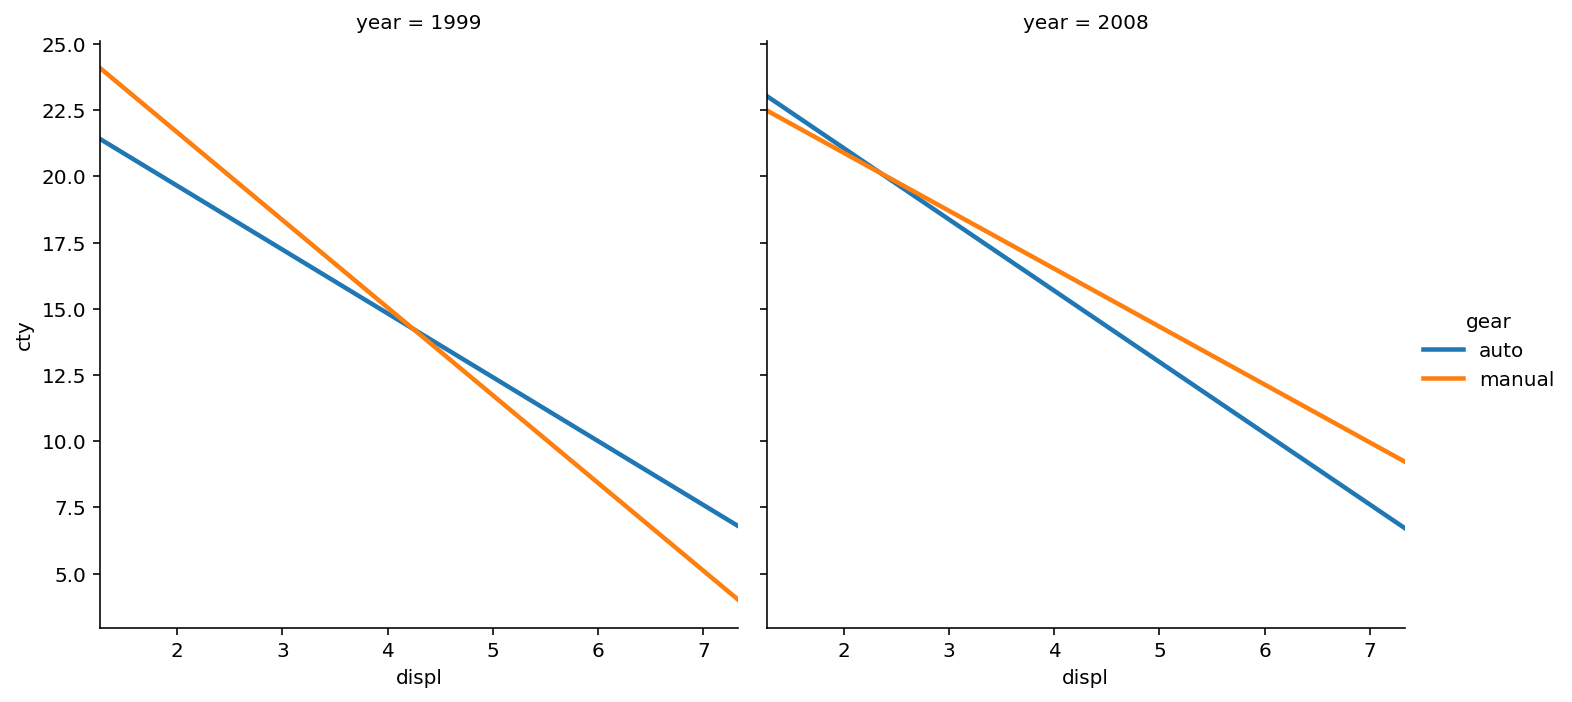

In [14]:
sns.lmplot(x='displ', y='cty', data=df, 
           hue='gear',
           col='year',
           ci=False,
           scatter=False)

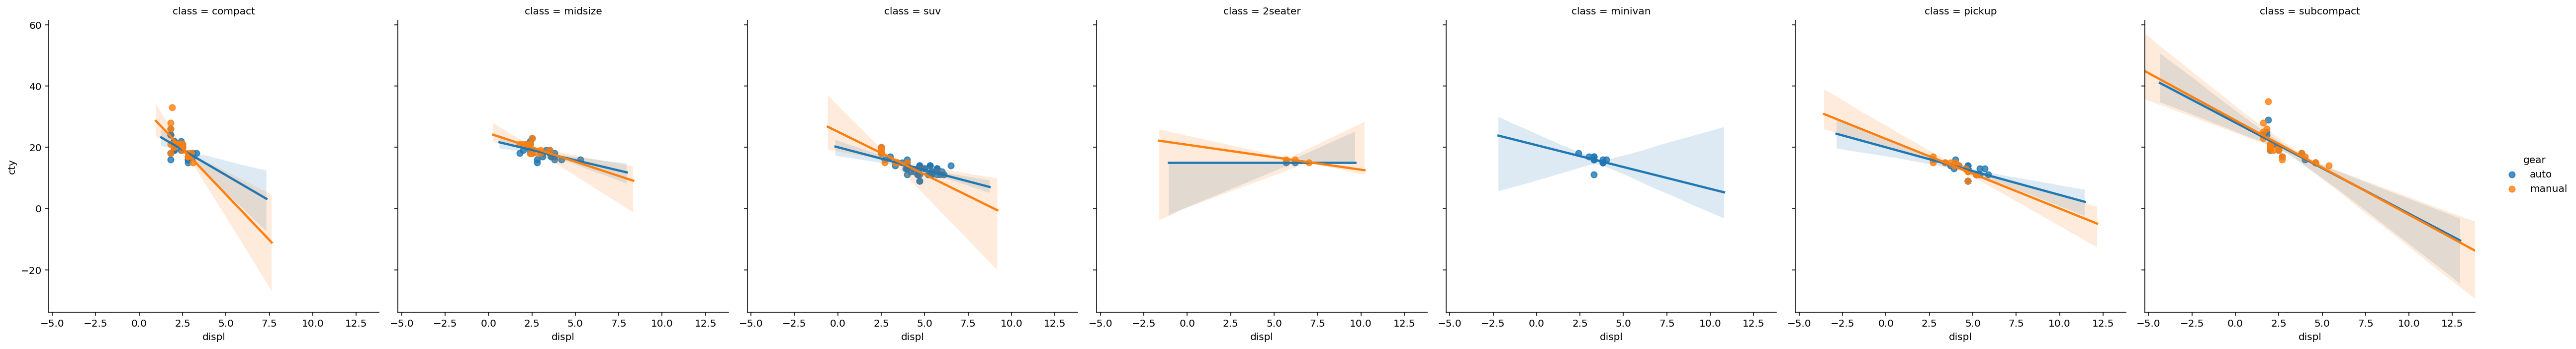

In [15]:
sns.lmplot(x='displ', y='cty', data=df, 
           hue='gear',
           col='class')

## matplotlib markers
https://matplotlib.org/api/markers_api.html

In [16]:
from IPython.display import IFrame
IFrame('https://matplotlib.org/api/markers_api.html', width=640, height=240)

### column wrap and size

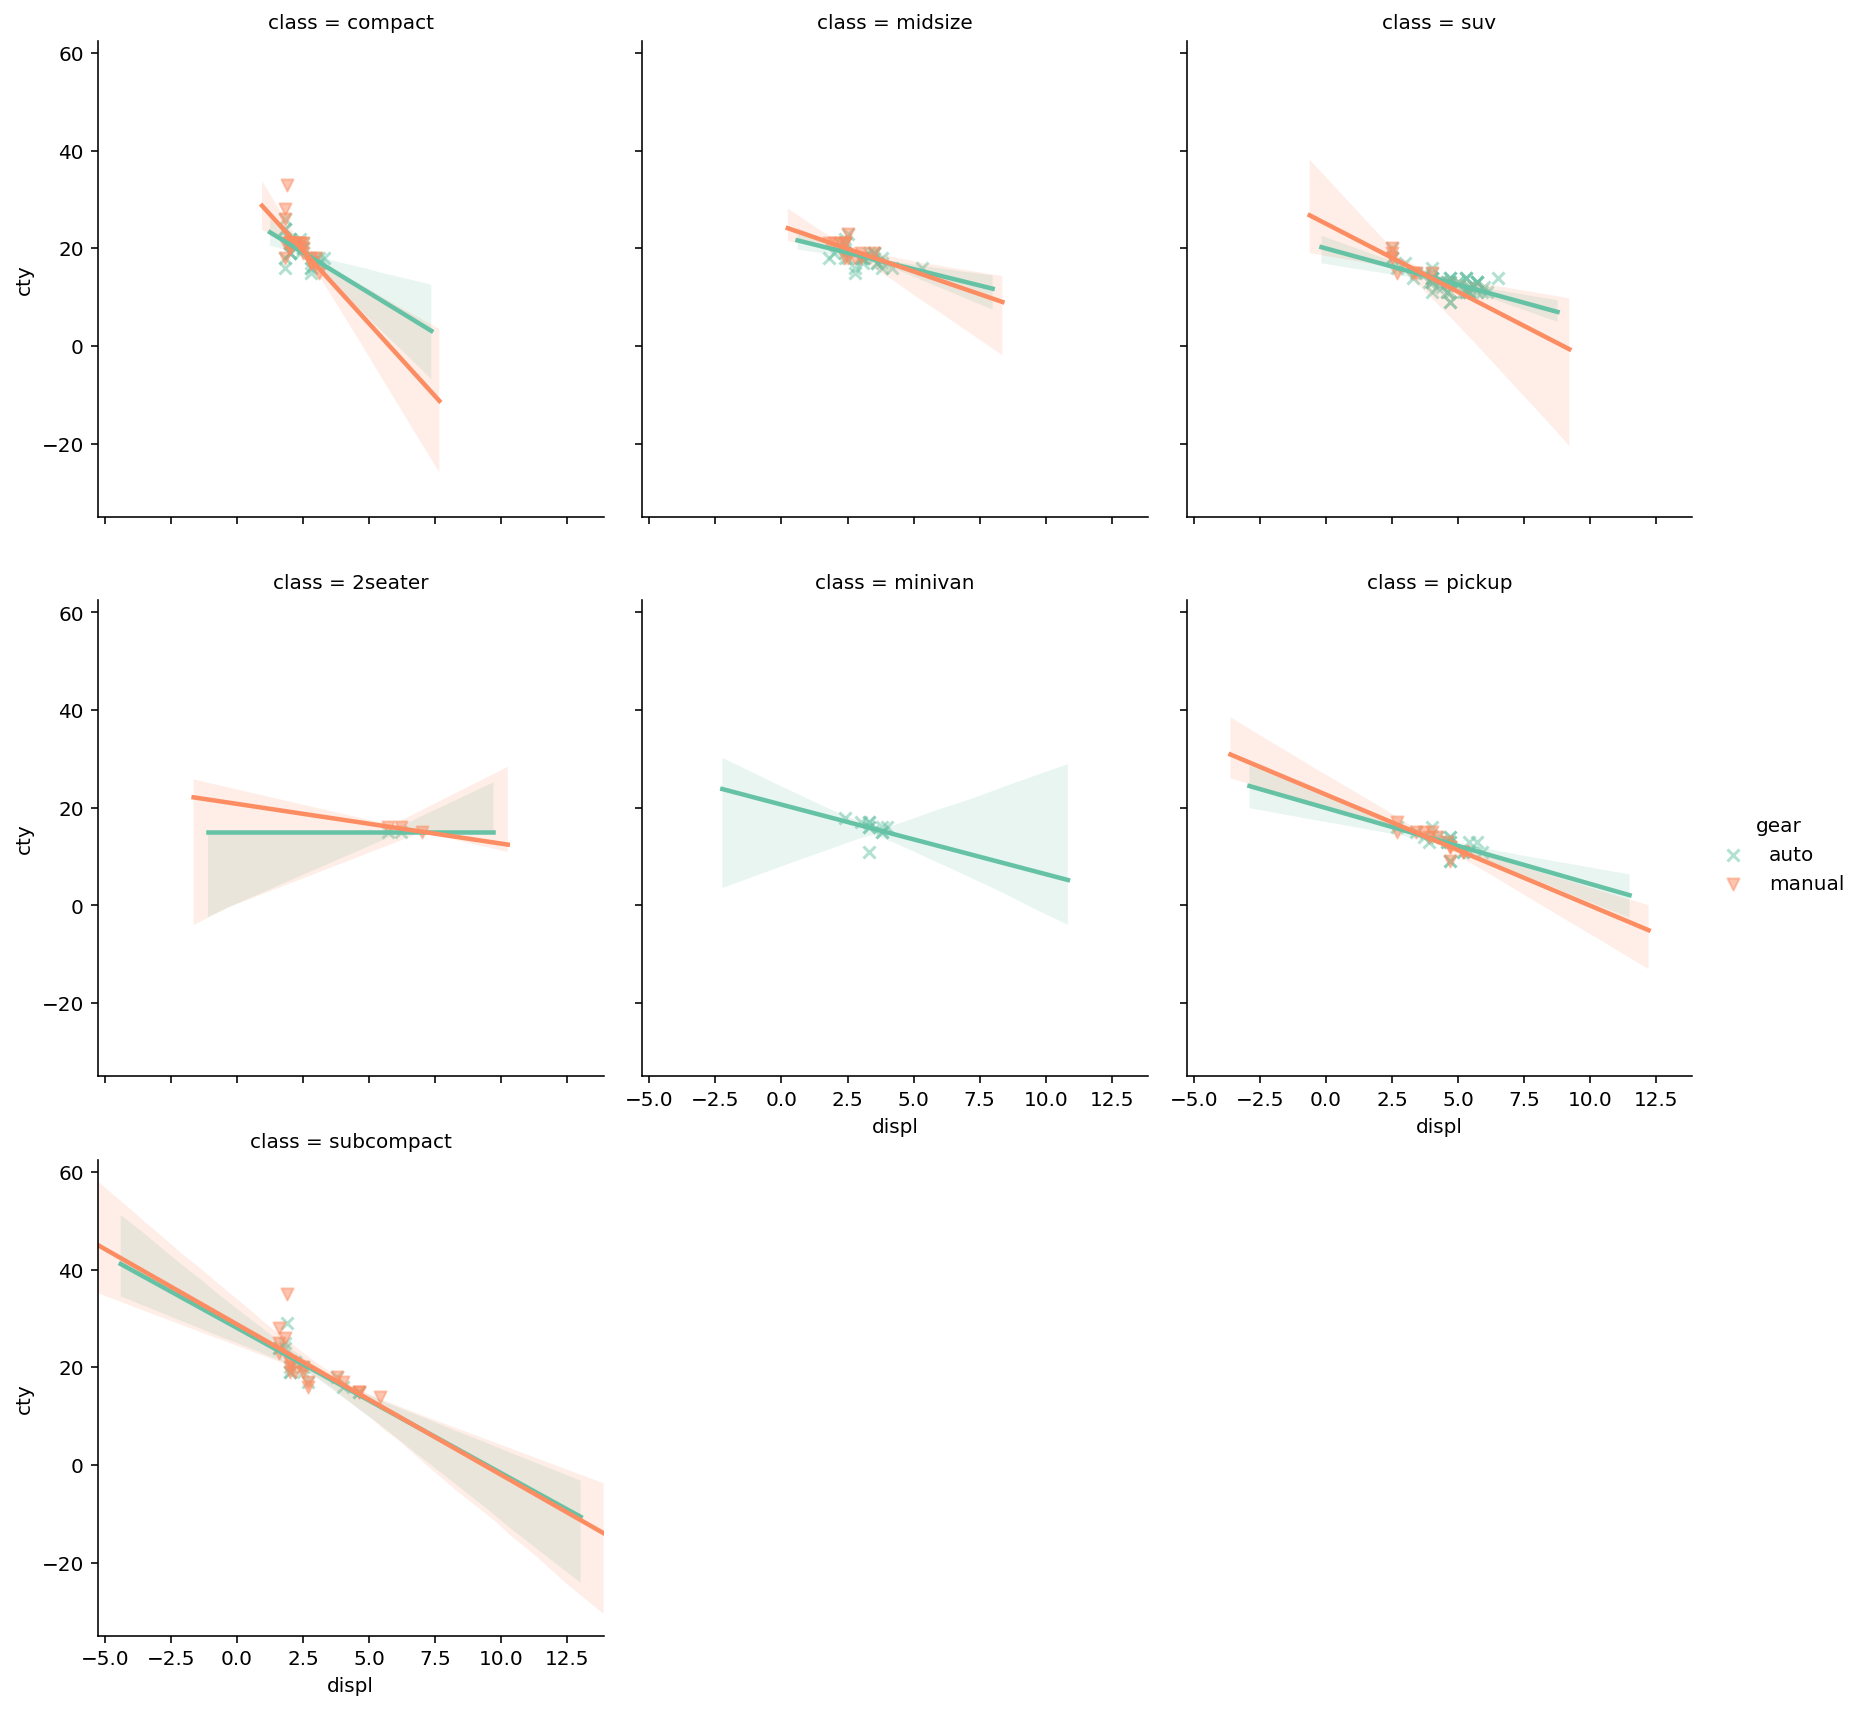

In [17]:
sns.lmplot(x='displ', y='cty', data=df, 
           hue='gear',
           markers=["x", "v"], 
           col='class',
           col_wrap=3,
           height=4,
           palette="Set2",
           scatter_kws={'alpha':.5})

In [18]:
# palette dict

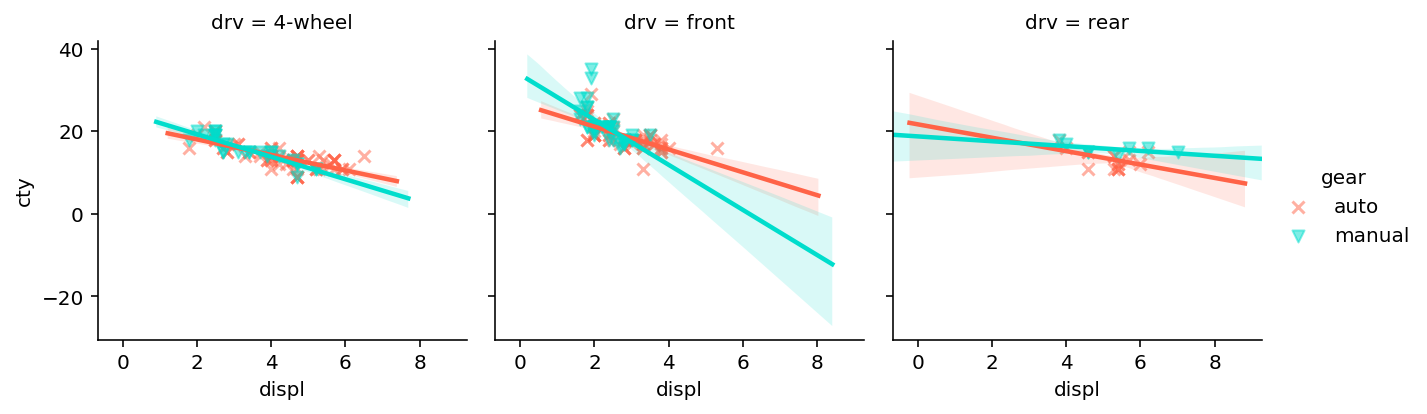

In [19]:
sns.lmplot(x='displ', y='cty', data=df, 
           hue='gear',
           markers=["x", "v"], 
           col='drv',
           col_wrap=3,
           height=3, aspect=1,
           palette={'auto':'tomato', 'manual':'#00ddcc'},
           scatter_kws={'alpha':.5})

## logistic regression
https://en.wikipedia.org/wiki/Logistic_regression  
A group of 20 students spend between 0 and 6 hours studying for an exam. How does the number of hours spent studying affect the probability that the student will pass the exam?

In [20]:
df2=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv')
df2.sample(5)

,Hours,Pass
10,2.75,1
15,4.25,1
1,0.75,0
14,4.00,1
5,1.75,0


/Users/prasert/miniconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/prasert/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


Text(6.800000000000004, 0.5, 'Probability of passing exam')

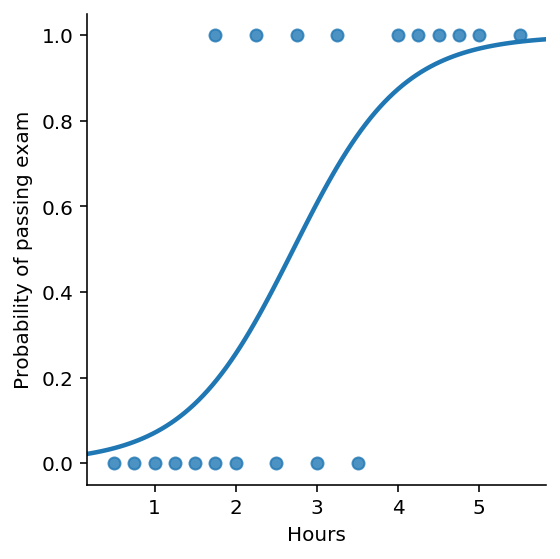

In [21]:
sns.lmplot(x='Hours', y='Pass', data=df2,
           logistic=True, size=4)
plt.ylabel('Probability of passing exam')

## lmplot vs regplot

In [22]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [23]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
0,audi,a4,1.8,1999,4,auto(l5),front,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),front,21,29,p,compact,manual
2,audi,a4,2.0,2008,4,manual(m6),front,20,31,p,compact,manual
3,audi,a4,2.0,2008,4,auto(av),front,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact,auto


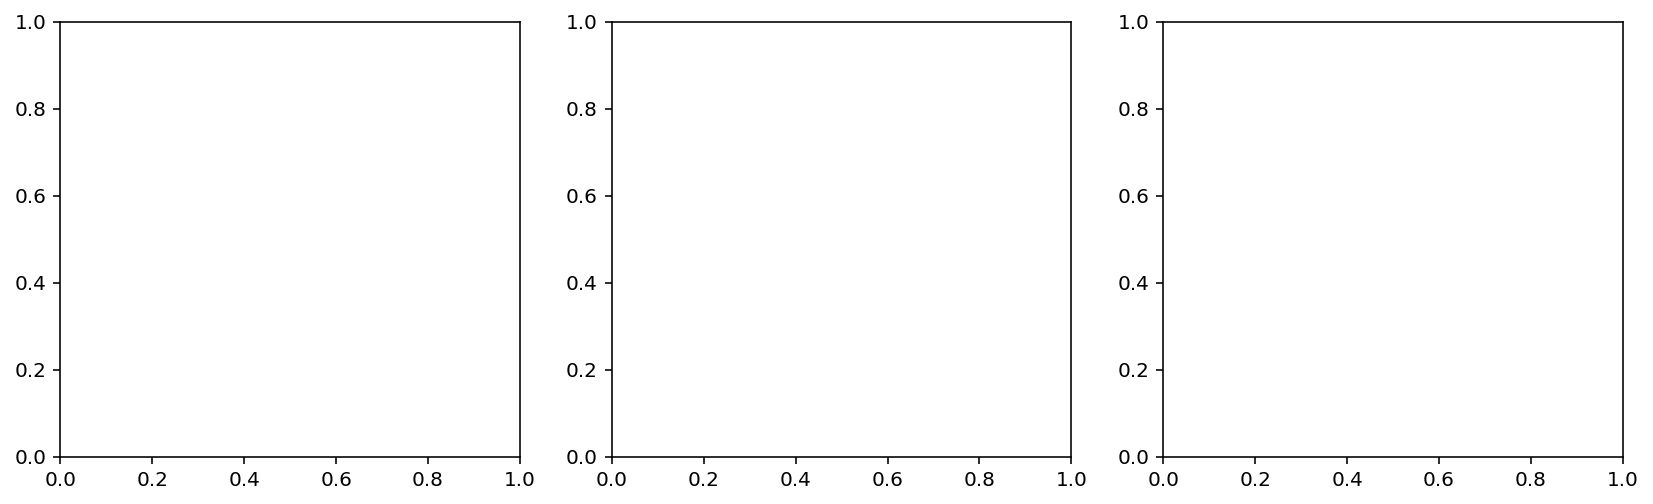

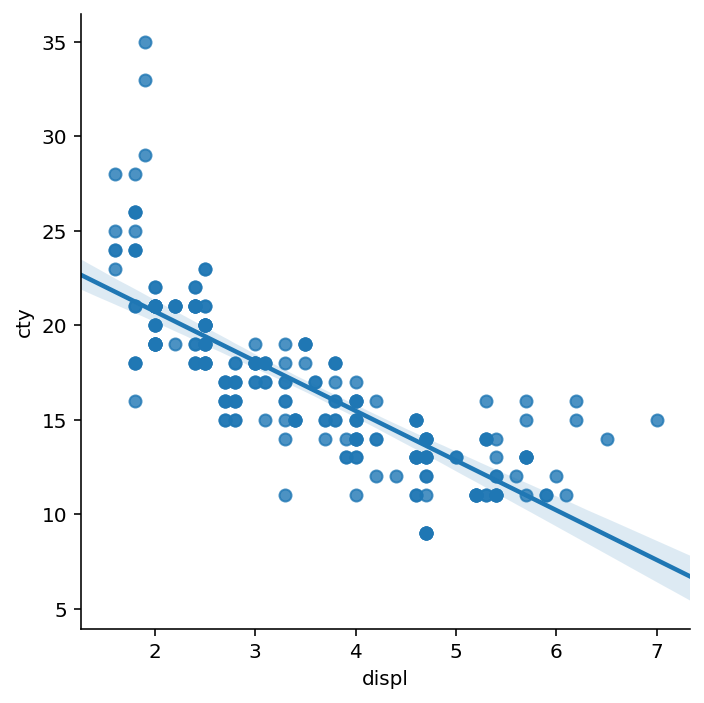

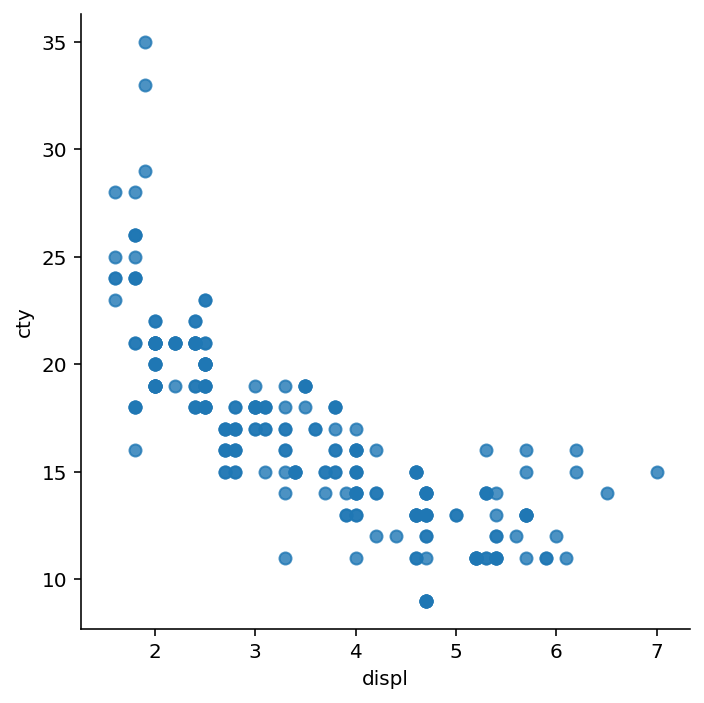

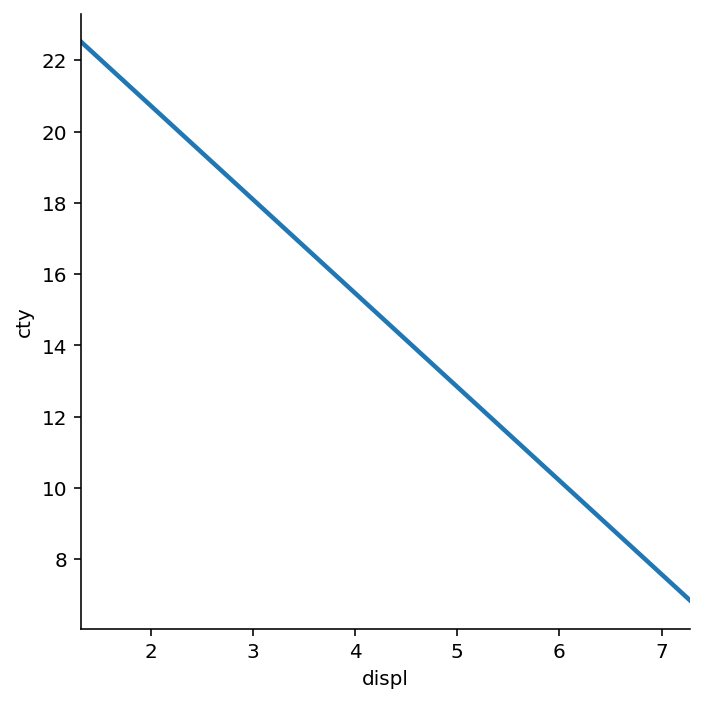

In [24]:
fig = plt.figure(figsize=(14,4))
x_col='displ'
y_col='cty'
fig.add_subplot(131)
sns.lmplot(x=x_col, y=y_col, data=df)
fig.add_subplot(132)
sns.lmplot(x=x_col, y=y_col, data=df, fit_reg=False)
fig.add_subplot(133)
sns.lmplot(x=x_col, y=y_col, data=df, scatter=False, ci=False)

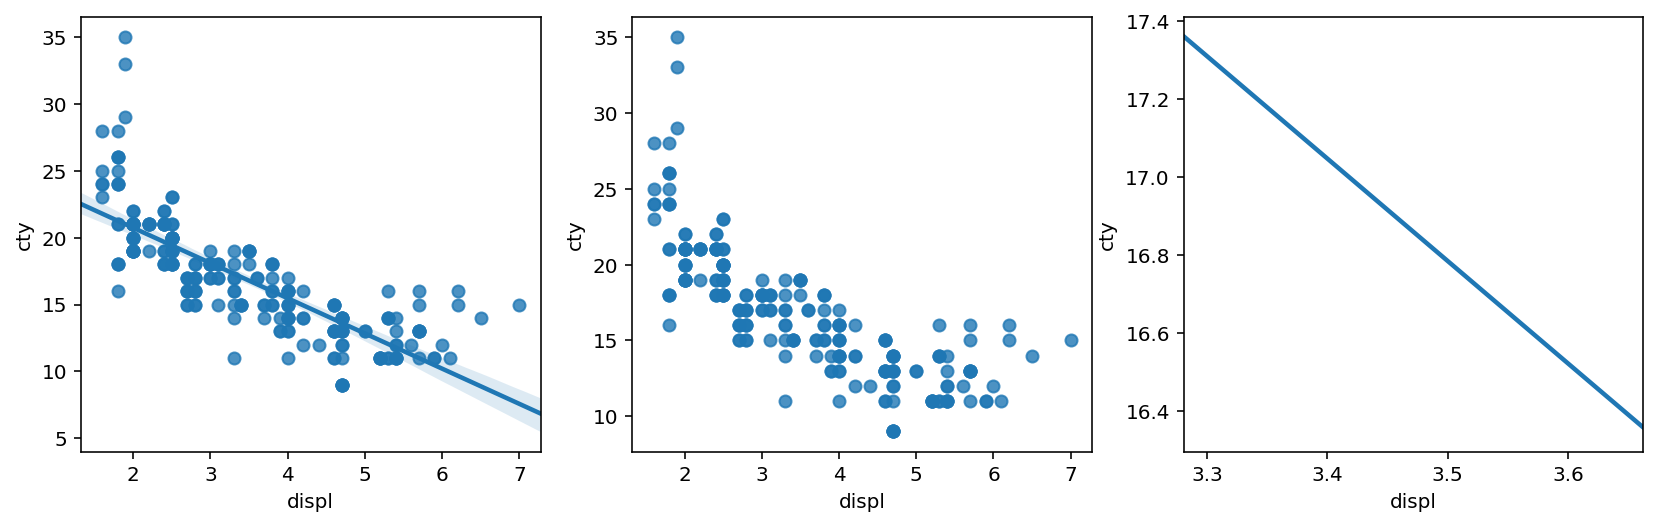

In [25]:
fig = plt.figure(figsize=(14,4))
x_col='displ'
y_col='cty'
fig.add_subplot(131)
sns.regplot(x=x_col, y=y_col, data=df)
fig.add_subplot(132)
sns.regplot(x=x_col, y=y_col, data=df, fit_reg=False)
fig.add_subplot(133)
sns.regplot(x=x_col, y=y_col, data=df, scatter=False, ci=False)

(3,)


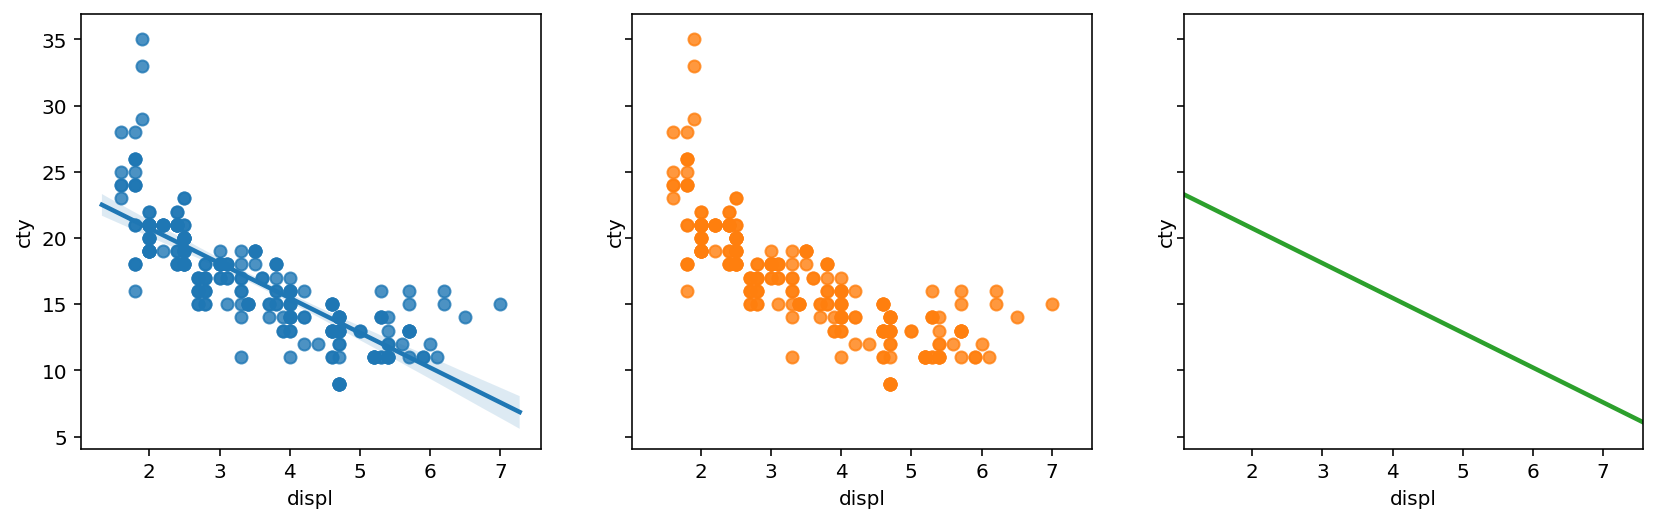

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(14,4), sharey=True, sharex=True)
print(ax.shape)
x_col='displ'
y_col='cty'

sns.regplot(x=x_col, y=y_col, data=df, ax=ax[0])
sns.regplot(x=x_col, y=y_col, data=df, fit_reg=False, ax=ax[1])
sns.regplot(x=x_col, y=y_col, data=df, scatter=False, ci=False, ax=ax[2])

(2, 3)


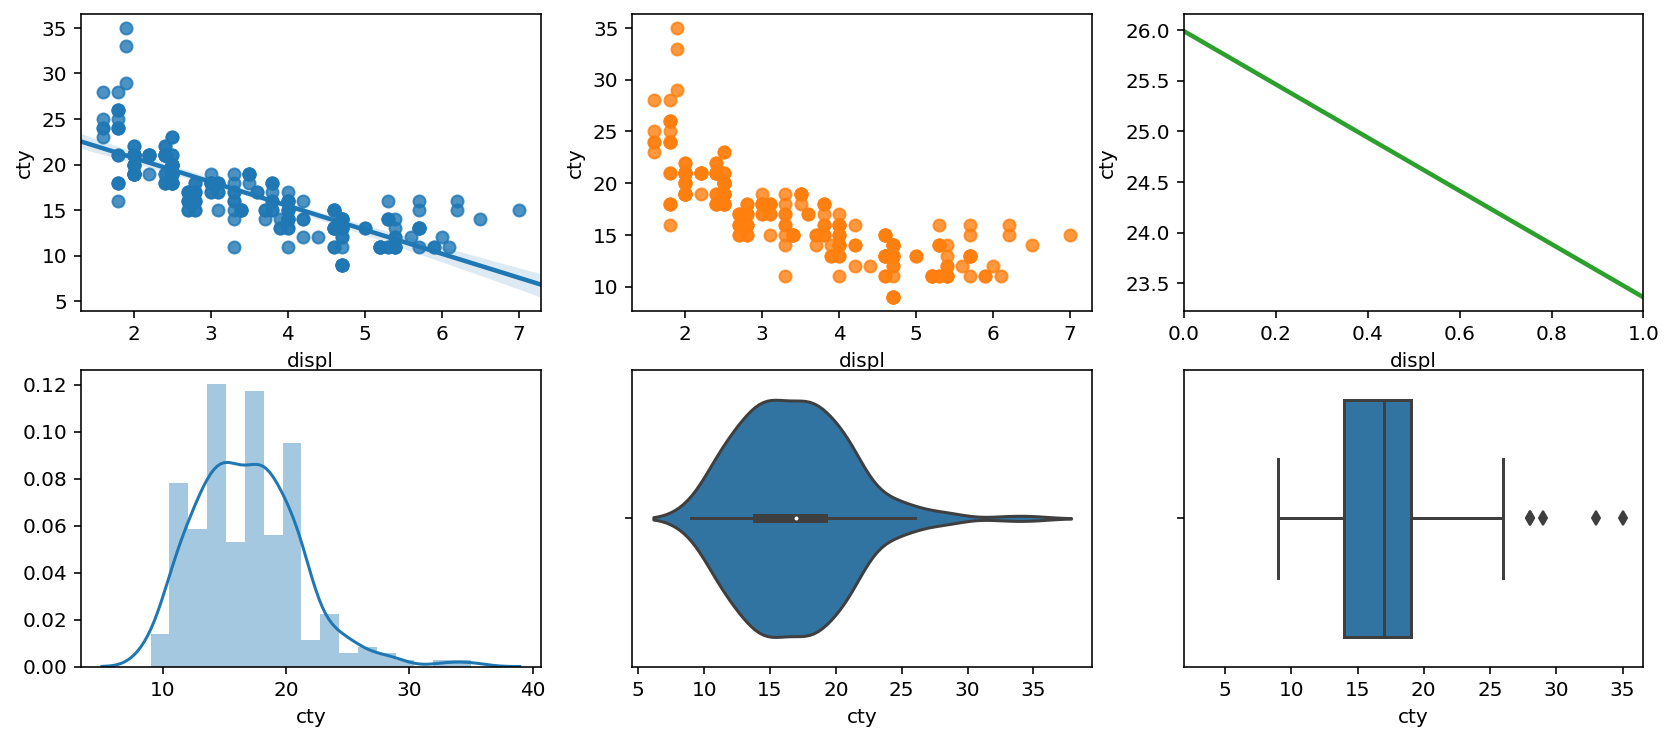

In [27]:
fig, ax = plt.subplots(2, 3, figsize=(14,6), sharey=False, sharex=False)
print(ax.shape)
x_col='displ'
y_col='cty'

sns.regplot(x=x_col, y=y_col, data=df, ax=ax[0, 0])
sns.regplot(x=x_col, y=y_col, data=df, fit_reg=False, ax=ax[0, 1])
sns.regplot(x=x_col, y=y_col, data=df, scatter=False, ci=False, ax=ax[0, 2])
sns.distplot(df.cty, ax=ax[1, 0])
sns.violinplot(df.cty, ax=ax[1, 1])
sns.boxplot(df.cty, ax=ax[1, 2])